## Importar librerias

In [1]:
import os
os.environ['OMP_NUM_THREADS'] = '1'
!set OMP_NUM_THREADS=1

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import scale
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import calinski_harabasz_score

## Simulación y Análisis K-Means en Datos Simulados

### Simulacion

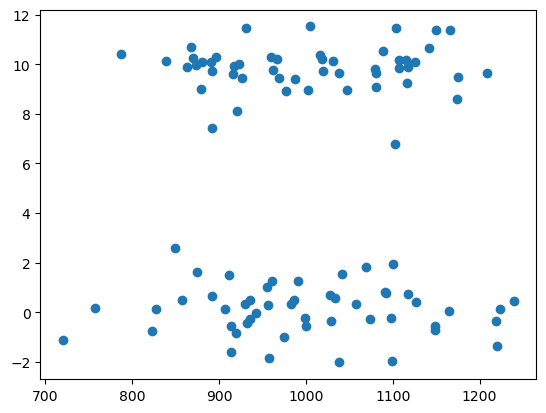

In [3]:
np.random.seed(123)
x = np.column_stack([np.random.normal(1000, 100, 100), np.concatenate(
    [np.random.normal(0, 1, 50), np.random.normal(10, 1, 50)])])
plt.scatter(x[:, 0], x[:, 1], marker='o')
plt.show()

### K-means en datos originales

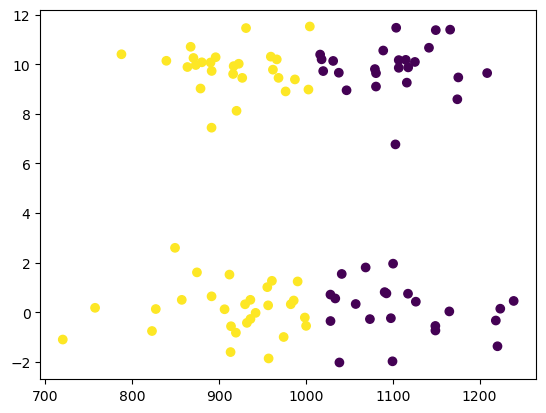

In [4]:
kmeans_orig = KMeans(n_clusters=2, n_init=10)
kmeans_orig.fit(x)
plt.scatter(x[:, 0], x[:, 1], c=kmeans_orig.labels_, cmap='viridis', marker='o')
plt.show()

## Estandarización y Análisis K-Means en Datos Estandarizados:

### Estandarizacion

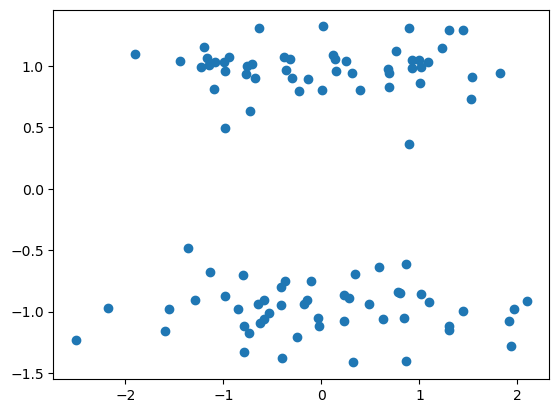

In [5]:
xs = scale(x)
plt.scatter(xs[:, 0], xs[:, 1], marker='o')
plt.show()

### K-means en datos estandarizados

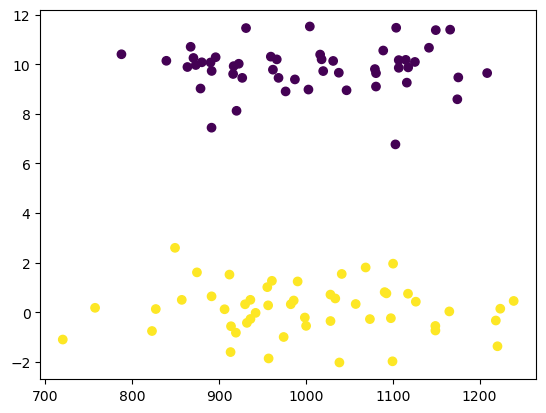

In [6]:
kmeans_std = KMeans(n_clusters=2, n_init=10)
kmeans_std.fit(xs)
plt.scatter(x[:, 0], x[:, 1], c=kmeans_std.labels_, cmap='viridis', marker='o')
plt.show()

## Análisis de Cluster con datos del archivo

### Lectura de datos desde un archivo CSV

In [7]:
movil = pd.read_csv("./data/data_cluster.csv", sep=" ")
movil1 = movil.iloc[:, 3:11]
zmovil1 = scale(movil1)

### Conglomerado K-means

In [8]:
kmeans_clusters = KMeans(n_clusters=2, n_init=50)
kmeans_clusters.fit(zmovil1)
print(kmeans_clusters.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 0
 0 0 1 0 1 1 0 0 0 0 1 0 0 1 0 1 1 1 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0
 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 1 1 1 1 1 0 0 0 0 0 1
 1 1 1 1 1 1 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 1 0 1
 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 1 1 1 1 1 1 1 1 1 0 0 0
 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]


In [9]:
print(kmeans_clusters.inertia_)

1648.1648461958634


### Determinación del número óptimo de conglomerados 

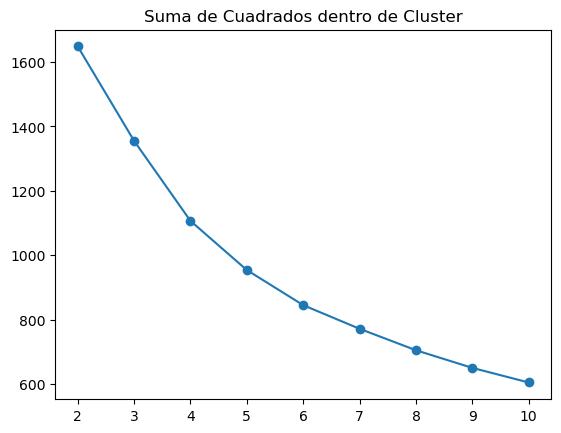

In [10]:
# Determinar número de conglomerados
wss = []
for h in range(2, 11):
    kmeans_h = KMeans(n_clusters=h, n_init=50)
    kmeans_h.fit(zmovil1)
    wss.append(kmeans_h.inertia_)

plt.plot(range(2, 11), wss, marker='o')
plt.title("Suma de Cuadrados dentro de Cluster")
plt.show()

In [11]:
from sklearn.metrics import silhouette_samples

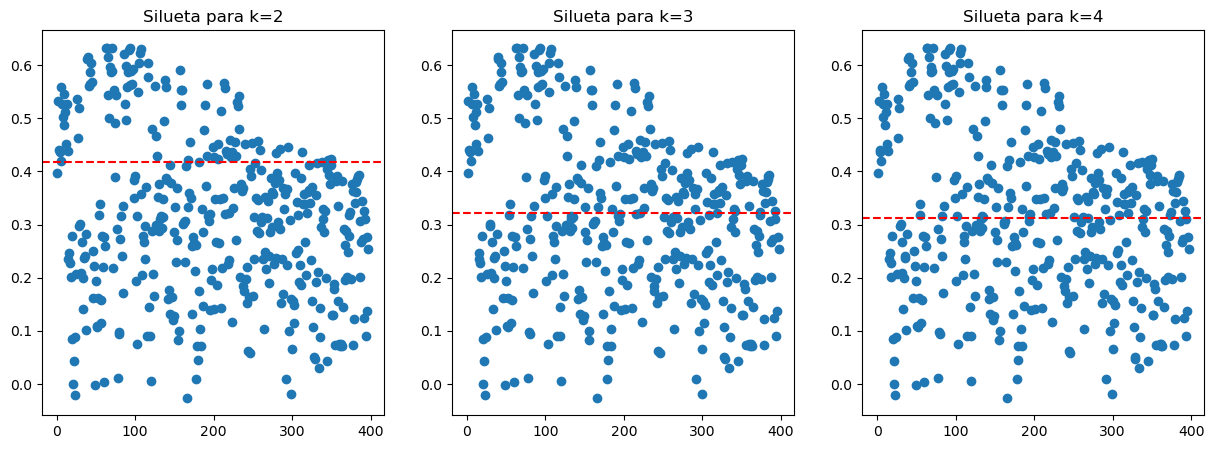

In [12]:
# Silueta
silhouette_scores = []
for h in range(2, 5):
    kmeans_sil = KMeans(n_clusters=h, n_init=50)
    kmeans_sil.fit(zmovil1)
    silhouette_scores.append(silhouette_score(zmovil1, kmeans_sil.labels_))

plt.figure(figsize=(15, 5))
for h, score in enumerate(silhouette_scores, start=2):
    plt.subplot(1, 3, h-1)
    plt.title(f'Silueta para k={h}')
    plt.scatter(range(1, len(kmeans_sil.labels_)+1), silhouette_samples(zmovil1, kmeans_sil.labels_))
    plt.axhline(y=score, color="red", linestyle="--")

plt.show()

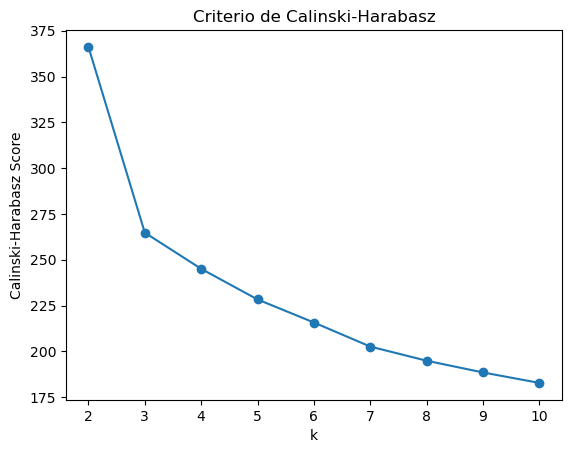

In [13]:
# Criterio de Calinski-Harabasz
ch_scores = []
for h in range(2, 11):
    kmeans_ch = KMeans(n_clusters=h, n_init=100)
    kmeans_ch.fit(zmovil1)
    ch_scores.append(calinski_harabasz_score(zmovil1, kmeans_ch.labels_))

plt.plot(range(2, 11), ch_scores, marker='o')
plt.title("Criterio de Calinski-Harabasz")
plt.xlabel("k")
plt.ylabel("Calinski-Harabasz Score")
plt.show()

### Perfilamiento de los clusters.

In [14]:
kmeans_movil = KMeans(n_clusters=2, random_state=0, n_init=10)
kmeans_movil.fit(zmovil1)

KMeans(n_clusters=2, n_init=10, random_state=0)

In [15]:
movil_cl = pd.concat([movil, pd.Series(kmeans_movil.labels_, name='Clust')], axis=1)
movil_cl = movil_cl.drop(397)
movil_cl

,Id,Sexo,Estad_Civil,Ingreso_mensual_cliente,N_llamada_recib,N_recargas,Tot_Min_consum,N_mens_tex_env,N_llamadas_realiz,Antig_cliente_meses,N_reclamos,Clust
1,1.0,Masculino,Casado,3504.0,18.0,8.0,307.0,17.0,12.0,70.0,1.0,1.0
2,2.0,Femenino,Soltero,3693.0,15.0,8.0,350.0,35.0,12.0,70.0,1.0,1.0
3,3.0,Masculino,Soltero,3436.0,18.0,8.0,318.0,29.0,11.0,70.0,1.0,1.0
4,4.0,Masculino,Casado,3433.0,16.0,8.0,304.0,29.0,12.0,70.0,1.0,1.0
5,5.0,Masculino,Soltero,3449.0,17.0,8.0,302.0,24.0,10.0,70.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
393,393.0,Masculino,Casado,2790.0,27.0,4.0,140.0,82.0,16.0,82.0,1.0,0.0
394,394.0,Femenino,Casado,2130.0,44.0,4.0,97.0,53.0,25.0,82.0,2.0,0.0
395,395.0,Femenino,Soltero,2295.0,32.0,4.0,135.0,80.0,12.0,82.0,1.0,0.0
396,396.0,Masculino,Casado,2625.0,28.0,4.0,120.0,75.0,19.0,82.0,1.0,0.0


In [16]:
# Perfilamiento de los clusters
movil_cl.reset_index(drop=True, inplace=True)
movil_cl['Clust'] = kmeans_movil.labels_


In [17]:
#movil_cl = movil_cl.drop(396)
movil_cl2 = movil_cl.drop(['Sexo', 'Estad_Civil'], axis = 1)
# Calcular el promedio por cluster
cluster_means = movil_cl2.groupby('Clust').mean()
cluster_means

,Id,Ingreso_mensual_cliente,N_llamada_recib,N_recargas,Tot_Min_consum,N_mens_tex_env,N_llamadas_realiz,Antig_cliente_meses,N_reclamos
Clust,,,,,,,,,
0,231.596708,2423.378601,28.078189,4.283951,122.594650,68.263374,16.555556,76.995885,1.925926
1,145.934641,3840.477124,16.220915,7.333333,306.686275,24.745098,13.947712,74.366013,1.019608


## Análisis Cluster Jerárquico (AGNES y DIANA) 

In [18]:
# AGNES
agnes_clusters = AgglomerativeClustering(n_clusters=2, linkage='ward', metric='euclidean')
agnes_labels = agnes_clusters.fit_predict(zmovil1)
print(agnes_labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0 1 1 1 1 0 0 0 1
 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 1 1
 1 1 0 1 0 0 1 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 0 1 0 0 0 0 0 0 1 1 1 1 1 0
 0 0 0 0 0 0 1 0 0 0 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 0 0 1 1 1 0 1 0
 1 0 0 0 0 0 0 1 1 1 1 1 0 1 1 0 0 0 0 1 1 0 1 1 1 0 0 0 0 0 0 0 0 0 1 1 1
 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1
 0 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 0 0 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1]


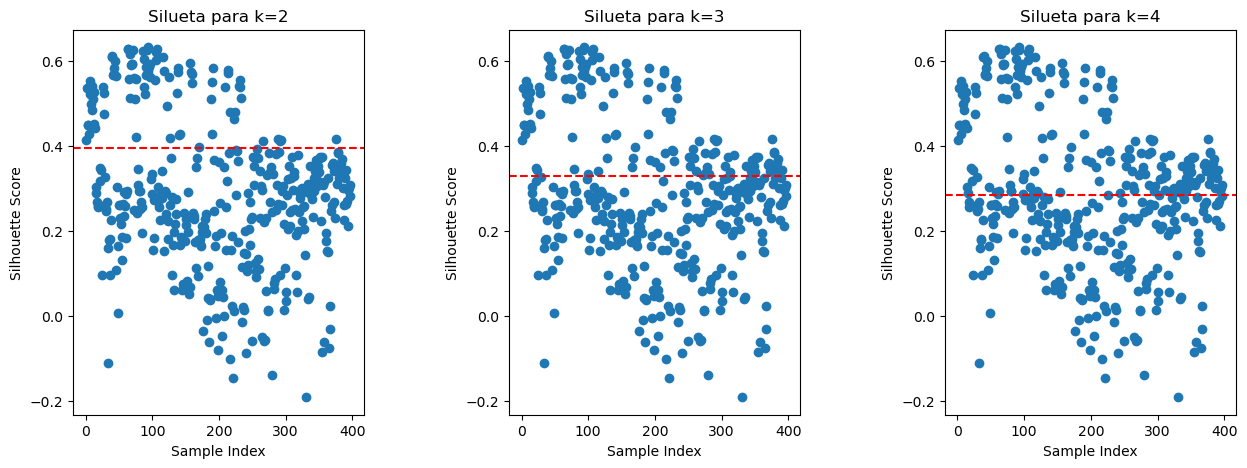

In [19]:
# Silueta para AGNES
silhouette_scores_agnes = []

# Update 'affinity' to 'metric'
for h in range(2, 5):
    agnes_sil = AgglomerativeClustering(n_clusters=h, metric='euclidean', linkage='ward')
    agnes_labels_sil = agnes_sil.fit_predict(zmovil1)
    silhouette_avg = silhouette_score(zmovil1, agnes_labels_sil)
    silhouette_scores_agnes.append(silhouette_avg)

plt.figure(figsize=(15, 5))
for h, score in enumerate(silhouette_scores_agnes, start=2):
    plt.subplot(1, 3, h-1)
    plt.title(f'Silueta para k={h}')
    plt.scatter(range(1, len(agnes_labels_sil)+1), silhouette_samples(zmovil1, agnes_labels_sil))
    plt.axhline(y=score, color="red", linestyle="--")
    plt.xlabel('Sample Index')
    plt.ylabel('Silhouette Score')

# Adjust subplot parameters
plt.subplots_adjust(wspace=0.5)

plt.show()

## Funciones Auxiliares y Visualización de Resultados

In [20]:
# Base con el cluster de pertenencia para AGNES
movil_agnes = pd.concat([movil, pd.Series(agnes_labels, name='Clust')], axis=1)
print(movil_agnes)

        Id       Sexo Estad_Civil  Ingreso_mensual_cliente  N_llamada_recib  \
1      1.0  Masculino      Casado                   3504.0             18.0   
2      2.0   Femenino     Soltero                   3693.0             15.0   
3      3.0  Masculino     Soltero                   3436.0             18.0   
4      4.0  Masculino      Casado                   3433.0             16.0   
5      5.0  Masculino     Soltero                   3449.0             17.0   
..     ...        ...         ...                      ...              ...   
394  394.0   Femenino      Casado                   2130.0             44.0   
395  395.0   Femenino     Soltero                   2295.0             32.0   
396  396.0  Masculino      Casado                   2625.0             28.0   
397  397.0  Masculino      Casado                   2720.0             31.0   
0      NaN        NaN         NaN                      NaN              NaN   

     N_recargas  Tot_Min_consum  N_mens_tex_env  N_

In [21]:
# DIANA
diana_clusters = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='single')
diana_labels = diana_clusters.fit_predict(zmovil1)
print(diana_labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


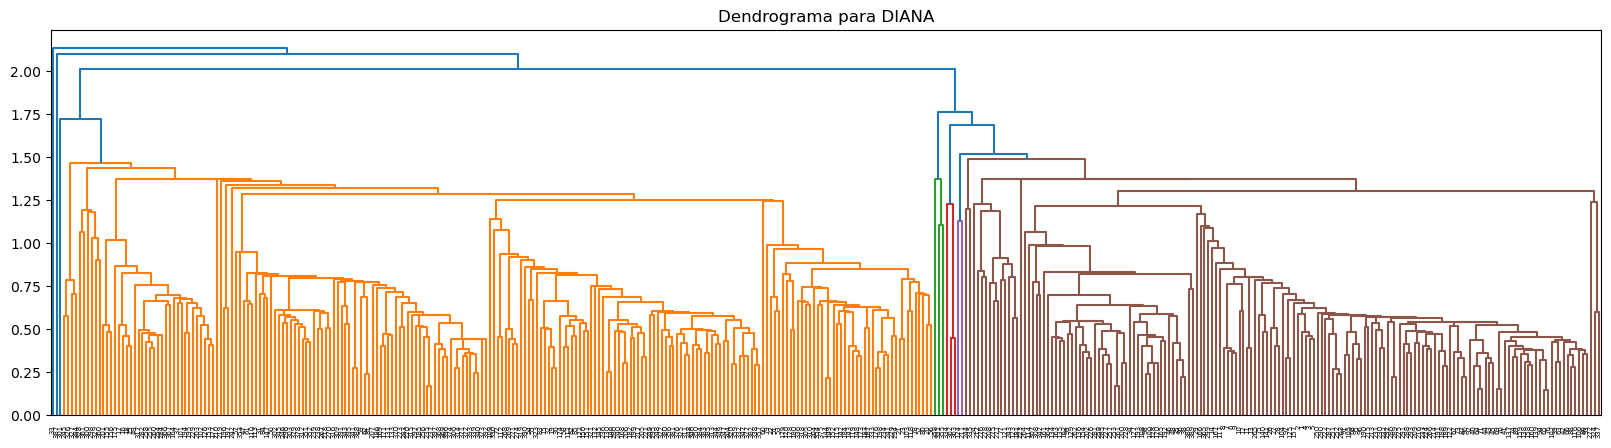

In [24]:
# Dendrograma para DIANA
diana_linkage = linkage(zmovil1, method='single')
plt.figure(figsize=(20, 5))
dendrogram(diana_linkage, labels=movil.index)
plt.title("Dendrograma para DIANA")
plt.show()

In [23]:
# Base con el cluster de pertenencia para DIANA
movil_diana = pd.concat([movil, pd.Series(diana_labels, name='Clust')], axis=1)
movil_diana

,Id,Sexo,Estad_Civil,Ingreso_mensual_cliente,N_llamada_recib,N_recargas,Tot_Min_consum,N_mens_tex_env,N_llamadas_realiz,Antig_cliente_meses,N_reclamos,Clust
1,1.0,Masculino,Casado,3504.0,18.0,8.0,307.0,17.0,12.0,70.0,1.0,0.0
2,2.0,Femenino,Soltero,3693.0,15.0,8.0,350.0,35.0,12.0,70.0,1.0,0.0
3,3.0,Masculino,Soltero,3436.0,18.0,8.0,318.0,29.0,11.0,70.0,1.0,0.0
4,4.0,Masculino,Casado,3433.0,16.0,8.0,304.0,29.0,12.0,70.0,1.0,0.0
5,5.0,Masculino,Soltero,3449.0,17.0,8.0,302.0,24.0,10.0,70.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
394,394.0,Femenino,Casado,2130.0,44.0,4.0,97.0,53.0,25.0,82.0,2.0,0.0
395,395.0,Femenino,Soltero,2295.0,32.0,4.0,135.0,80.0,12.0,82.0,1.0,0.0
396,396.0,Masculino,Casado,2625.0,28.0,4.0,120.0,75.0,19.0,82.0,1.0,0.0
397,397.0,Masculino,Casado,2720.0,31.0,4.0,119.0,78.0,19.0,82.0,1.0,NaN
